In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Goal: 
# See if I can find census/health data for that area 
# and that time and do some light data analysis to see if
# I can pick out any trends. (The idea here is to compare 
# those trends to the dataset/models to see if there are any patterns.)

In [2]:
# Read the File
df = pd.read_csv('3_year_recidivism_elaborated_2.csv')
df

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Main Supervising District,Release type: Paroled to Detainer united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,4JD,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,7JD,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,5JD,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,8JD,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,3JD,Parole,Yes,1
...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,White - Hispanic,25-34,C Felony,Violent,Not Mentioned,Discharged End of Sentence,Yes,0
26016,2015,2018,White - Non-Hispanic,25-34,D Felony,Property,5JD,Paroled to Detainer,No,0
26017,2015,2018,Black - Non-Hispanic,Under 25,Aggravated Misdemeanor,Violent,1JD,Discharged End of Sentence,Yes,0
26018,2015,2018,White - Non-Hispanic,Under 25,D Felony,Drug,5JD,Parole,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fiscal Year Released                      26020 non-null  int64 
 1   Recidivism Reporting Year                 26020 non-null  int64 
 2   Race - Ethnicity                          26020 non-null  object
 3   Age At Release                            26020 non-null  object
 4   Convicting Offense Classification         26020 non-null  object
 5   Convicting Offense Type                   26020 non-null  object
 6   Main Supervising District                 26020 non-null  object
 7   Release type: Paroled to Detainer united  26020 non-null  object
 8   Part of Target Population                 26020 non-null  object
 9   Recidivism - Return to Prison numeric     26020 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.0+ MB


In [4]:
df["Recidivism Reporting Year"].value_counts()
# Okay so the whole goal - as described by Bryan, is to predict recidivism based on the person
# And I need to polish it up before doing data analysis so I can pick up some trends
# The particular area and time I will be analyzing is for 2015 just because it has the most data 

2015    4740
2016    4687
2017    4586
2018    4374
2014    3917
2013    3716
Name: Recidivism Reporting Year, dtype: int64

In [5]:
# Now read the Drug Consumption Survey
drug_df = pd.read_csv("Drug_Consumption.csv")
drug_df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [6]:
# (More info about the dataframe columns is here: https://www.kaggle.com/obeykhadija/drug-consumptions-uci?select=Drug_Consumption.csv )
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

In [7]:
# Okay we can specify we only want the stats from the US
drug_df = drug_df[drug_df.Country == "USA"]
# Drop any rows that have anything other than a CL0 (because those are outliers - Semer is a fictional control drug)
drug_df = drug_df[drug_df.Semer == "CL0"]
drug_df.Semer.unique()

array(['CL0'], dtype=object)

In [8]:
# Cool so that cleared that up 
# I can also drop the colums that aren't actually the drug-related variables we're looking for
# Choc = chocolate
# Caff = caffeine
drug_df = drug_df.drop('Choc', 1)
drug_df = drug_df.drop('Caff', 1)

<ipython-input-8-c6c8b08411af>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_df = drug_df.drop('Choc', 1)
<ipython-input-8-c6c8b08411af>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_df = drug_df.drop('Caff', 1)


In [9]:
# It gave an error but that's cause I ran it twice - it works
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 5 to 1882
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         551 non-null    int64  
 1   Age        551 non-null    object 
 2   Gender     551 non-null    object 
 3   Education  551 non-null    object 
 4   Country    551 non-null    object 
 5   Ethnicity  551 non-null    object 
 6   Nscore     551 non-null    float64
 7   Escore     551 non-null    float64
 8   Oscore     551 non-null    float64
 9   AScore     551 non-null    float64
 10  Cscore     551 non-null    float64
 11  Impulsive  551 non-null    float64
 12  SS         551 non-null    float64
 13  Alcohol    551 non-null    object 
 14  Amphet     551 non-null    object 
 15  Amyl       551 non-null    object 
 16  Benzos     551 non-null    object 
 17  Cannabis   551 non-null    object 
 18  Coke       551 non-null    object 
 19  Crack      551 non-null    object 
 20  Ecstasy  

In [10]:
# Okay now I want to group by Ethnicity so it will be easier to compare with the recidivism file
grouped_data = drug_df.groupby("Ethnicity")
grouped_data.describe()

ID                                                    \
                   count         mean         std     min      25%     50%   
Ethnicity                                                                    
Asian                3.0  1109.666667  182.869717   981.0  1005.00  1029.0   
Black                7.0  1538.000000  308.365043   970.0  1395.50  1684.0   
Mixed-Black/Asian    2.0  1264.500000  284.964033  1063.0  1163.75  1264.5   
Mixed-White/Asian   10.0  1268.500000  337.601754   778.0  1009.25  1304.5   
Mixed-White/Black    4.0  1110.000000  176.121170   918.0   984.00  1118.0   
Other               36.0  1292.250000  425.536728    35.0   935.25  1253.5   
White              489.0  1203.400818  392.536825     7.0   913.00  1176.0   

                                   Nscore            ... Impulsive           \
                       75%     max  count      mean  ...       75%      max   
Ethnicity                                            ...                      
Asian              1174.00  1319.0    3.0  0.558670  ...   1.08667  1.29221   
Black              1735.50  1850.0    7.0 -0.076070  ...  -0.01222  0.52975   
Mixed-Black/Asian  1365.25  1466.0    2.0  0.985030  ...   1.18944  1.29221   
Mixed-White/Asian  1476.75  1879.0   10.0  0.336770  ...   1.29221  1.86203   
Mixed-White/Black  1244.00  1286.0    4.0 -0.468288  ...   1.29221  1.29221   
Other              1611.00  1865.0   36.0  0.110242  ...   0.98390  2.90161   
White              1495.00  1887.0  489.0  0.227175  ...   0.88113  2.90161   

                      SS                                                   \
                   count      mean       std      min       25%       50%   
Ethnicity                                                                   
Asian                3.0  0.534343  1.195733 -0.84637  0.189165  1.224700   
Black                7.0  0.284794  0.484876 -0.52593  0.092865  0.401480   
Mixed-Black/Asian    2.0  0.504475  1.018552 -0.21575  0.144362  0.504475   
Mixed-White/Asian   10.0  0.721350  1.108679 -2.07848  0.492460  1.224700   
Mixed-White/Black    4.0  0.658783  0.700366 -0.21575  0.247173  0.813090   
Other               36.0  0.704164  0.839315 -1.18084  0.079870  0.765400   
White              489.0  0.394038  0.903106 -2.07848 -0.215750  0.401480   

                                      
                        75%      max  
Ethnicity                             
Asian              1.224700  1.22470  
Black              0.583440  0.76540  
Mixed-Black/Asian  0.864587  1.22470  
Mixed-White/Asian  1.224700  1.92173  
Mixed-White/Black  1.224700  1.22470  
Other              1.224700  1.92173  
White              1.224700  1.92173  

[7 rows x 64 columns]

In [11]:
# Okay it looks like the majority is white - this isn't really useful
# Instead I'm going to sort of assume that better education = better income 
# Obviously this isn't the case for everything, so if anything the stats will be messed up by this point in the analysis
# So from this point on all of the analysis is from assuming that a better education leads to more household income
new_grouped_data = drug_df.groupby("Education")
new_grouped_data.describe()

ID               \
                                                    count         mean   
Education                                                                
Doctorate degree                                     13.0  1215.307692   
Left school at 16 years                               9.0  1082.222222   
Left school at 17 years                               9.0  1328.555556   
Left school at 18 years                              34.0  1237.235294   
Left school before 16 years                           6.0  1069.000000   
Masters degree                                       38.0  1103.894737   
Professional certificate/ diploma                    41.0  1226.219512   
Some college or university, no certificate or d...  294.0  1196.190476   
University degree                                   107.0  1297.700935   

                                                                       \
                                                           std    min   
Education                                                               
Doctorate degree                                    386.787923  426.0   
Left school at 16 years                             435.318498  471.0   
Left school at 17 years                             506.099573  517.0   
Left school at 18 years                             319.354089  489.0   
Left school before 16 years                         681.231825   38.0   
Masters degree                                      380.112273    7.0   
Professional certificate/ diploma                   413.869938  301.0   
Some college or university, no certificate or d...  377.893674  119.0   
University degree                                   408.354965   35.0   

                                                                              \
                                                        25%     50%      75%   
Education                                                                      
Doctorate degree                                     999.00  1190.0  1501.00   
Left school at 16 years                              919.00  1186.0  1229.00   
Left school at 17 years                              934.00  1162.0  1791.00   
Left school at 18 years                             1011.75  1214.0  1478.25   
Left school before 16 years                          682.50  1190.5  1509.50   
Masters degree                                       874.50  1043.0  1232.00   
Professional certificate/ diploma                    943.00  1217.0  1510.00   
Some college or university, no certificate or d...   910.50  1173.5  1478.75   
University degree                                    987.00  1329.0  1745.50   

                                                           Nscore            \
                                                       max  count      mean   
Education                                                                     
Doctorate degree                                    1802.0   13.0  0.073530   
Left school at 16 years                             1855.0    9.0  0.612707   
Left school at 17 years                             1881.0    9.0  0.922303   
Left school at 18 years                             1875.0   34.0  0.362914   
Left school before 16 years                         1866.0    6.0  0.724452   
Masters degree                                      1829.0   38.0 -0.136983   
Professional certificate/ diploma                   1869.0   41.0  0.501080   
Some college or university, no certificate or d...  1887.0  294.0  0.178594   
University degree                                   1886.0  107.0  0.190311   

                                                    ... Impulsive           \
                                                    ...       75%      max   
Education                                           ...                      
Doctorate degree                                    ...   0.88113  1.86203   
Left school at 16 years                             ...  -0.21712  

In [12]:
# Oh also check for null values
drug_df.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Cannabis     0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [13]:
# Beautiful

In [14]:
# Okay since the majority is under "no certificate or degree" I want to see how that compares with Ethnicity
# But in order to do that I need to change them to measurable values 
# So let's do that for Education and Ethnicity
# Totally forgot how to put it on one line
# drug_df['Ethnicity'].replace('White', '0', regex=True)
# drug_df['Ethnicity'].replace([['Other'], 1])
# drug_df['Ethnicity'].replace([['Asian'], 2])
# drug_df['Ethnicity'].replace([['Black'], 3])
# drug_df['Ethnicity'].replace([['Mixed-Black/Asian'], 4])
# drug_df['Ethnicity'].replace([['Mixed-White/Asian'], 5])
# drug_df['Ethnicity'].replace([['Mixed-White/Black'], 6])

replacement_mapping_dict = {
    "White": 0,
    "Other": 1,
    "Asian": 2,
    "Black": 3,
    "Mixed-Black/Asian": 4,
    "Mixed-White/Asian": 5,
    "Mixed-White/Black": 6
}

drug_df["Ethnicity"] = drug_df["Ethnicity"].replace(replacement_mapping_dict)
drug_df 
# Since white is going to = 0, it will be easy to filter out when needed

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
5,7,45-54,M,Masters degree,USA,0,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
33,35,35-44,M,University degree,USA,1,1.02119,0.63779,0.88309,-2.90161,...,CL1,CL1,CL2,CL1,CL1,CL1,CL1,CL5,CL0,CL1
36,38,55-64,M,Left school before 16 years,USA,0,0.31287,0.32197,1.06238,0.13136,...,CL0,CL0,CL0,CL0,CL1,CL0,CL1,CL6,CL0,CL0
117,119,35-44,F,"Some college or university, no certificate or ...",USA,0,1.83990,-1.92173,-2.39883,1.11406,...,CL0,CL0,CL0,CL0,CL1,CL1,CL0,CL6,CL0,CL0
297,301,35-44,F,Professional certificate/ diploma,USA,0,0.82562,-0.94779,-0.17779,0.43852,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,1881,18-24,M,Left school at 17 years,USA,0,1.49158,-1.92173,-0.58331,-1.77200,...,CL2,CL5,CL0,CL2,CL0,CL6,CL0,CL6,CL0,CL2
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,0,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,0,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,0,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


In [15]:
# Mkay interesting
# Let's see if there's any correlations with Ethnicity
corr_matrix = drug_df.corr()
corr_matrix['Ethnicity'].sort_values(ascending=False, key=abs)

Ethnicity    1.000000
Escore       0.078015
Impulsive    0.072695
SS           0.062119
ID           0.047130
Cscore       0.025724
Nscore      -0.022544
Oscore      -0.009255
AScore       0.006303
Name: Ethnicity, dtype: float64

In [16]:
new_grouped_data = drug_df.groupby("Education")
new_grouped_data.describe()

ID               \
                                                    count         mean   
Education                                                                
Doctorate degree                                     13.0  1215.307692   
Left school at 16 years                               9.0  1082.222222   
Left school at 17 years                               9.0  1328.555556   
Left school at 18 years                              34.0  1237.235294   
Left school before 16 years                           6.0  1069.000000   
Masters degree                                       38.0  1103.894737   
Professional certificate/ diploma                    41.0  1226.219512   
Some college or university, no certificate or d...  294.0  1196.190476   
University degree                                   107.0  1297.700935   

                                                                       \
                                                           std    min   
Education                                                               
Doctorate degree                                    386.787923  426.0   
Left school at 16 years                             435.318498  471.0   
Left school at 17 years                             506.099573  517.0   
Left school at 18 years                             319.354089  489.0   
Left school before 16 years                         681.231825   38.0   
Masters degree                                      380.112273    7.0   
Professional certificate/ diploma                   413.869938  301.0   
Some college or university, no certificate or d...  377.893674  119.0   
University degree                                   408.354965   35.0   

                                                                              \
                                                        25%     50%      75%   
Education                                                                      
Doctorate degree                                     999.00  1190.0  1501.00   
Left school at 16 years                              919.00  1186.0  1229.00   
Left school at 17 years                              934.00  1162.0  1791.00   
Left school at 18 years                             1011.75  1214.0  1478.25   
Left school before 16 years                          682.50  1190.5  1509.50   
Masters degree                                       874.50  1043.0  1232.00   
Professional certificate/ diploma                    943.00  1217.0  1510.00   
Some college or university, no certificate or d...   910.50  1173.5  1478.75   
University degree                                    987.00  1329.0  1745.50   

                                                           Ethnicity  \
                                                       max     count   
Education                                                              
Doctorate degree                                    1802.0      13.0   
Left school at 16 years                             1855.0       9.0   
Left school at 17 years                             1881.0       9.0   
Left school at 18 years                             1875.0      34.0   
Left school before 16 years                         1866.0       6.0   
Masters degree                                      1829.0      38.0   
Professional certificate/ diploma                   1869.0      41.0   
Some college or university, no certificate or d...  1887.0     294.0   
University degree                                   1886.0     107.0   

                                                              ... Impulsive  \
                                                        mean  ...       75%   
Education                                                     ...             
Doctorate degree                                    0.230769  ...   0.88113   
Left school at 16 years                             0.000000  ...  -0.21712   
Left school at 17 years                             0.111111  ...   

In [17]:
# Okay it doesn't look like it
# How about Education - we can update the rows just like for Ethnicity
# Where 1 == educated, 0 = did not finish school
replacement_mapping_dict1 = {
    "Doctorate degree": 1,
    "Masters degree": 1,
    "University degree": 1,
    "Professional certificate/ diploma": 1,
    "Some college or university, no certificate or degree": 0,
    "Left school at 18 years": 0,
    "Left school at 17 years": 0,
    "Left school at 16 years": 0,
    "Left school before 16 years": 0
}

drug_df["Education"] = drug_df["Education"].replace(replacement_mapping_dict1)
drug_df 

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
5,7,45-54,M,1,USA,0,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
33,35,35-44,M,1,USA,1,1.02119,0.63779,0.88309,-2.90161,...,CL1,CL1,CL2,CL1,CL1,CL1,CL1,CL5,CL0,CL1
36,38,55-64,M,0,USA,0,0.31287,0.32197,1.06238,0.13136,...,CL0,CL0,CL0,CL0,CL1,CL0,CL1,CL6,CL0,CL0
117,119,35-44,F,0,USA,0,1.83990,-1.92173,-2.39883,1.11406,...,CL0,CL0,CL0,CL0,CL1,CL1,CL0,CL6,CL0,CL0
297,301,35-44,F,1,USA,0,0.82562,-0.94779,-0.17779,0.43852,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,1881,18-24,M,0,USA,0,1.49158,-1.92173,-0.58331,-1.77200,...,CL2,CL5,CL0,CL2,CL0,CL6,CL0,CL6,CL0,CL2
1879,1884,18-24,F,0,USA,0,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,0,USA,0,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,1,USA,0,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


In [18]:
# Now let's see if there's any correlation with Education
corr_matrix = drug_df.corr()
corr_matrix['Education'].sort_values(ascending=False, key=abs)

Education    1.000000
Cscore       0.144565
SS          -0.077403
ID           0.051673
Impulsive   -0.045369
AScore      -0.030352
Ethnicity   -0.029260
Nscore      -0.023842
Oscore       0.021403
Escore      -0.012222
Name: Education, dtype: float64

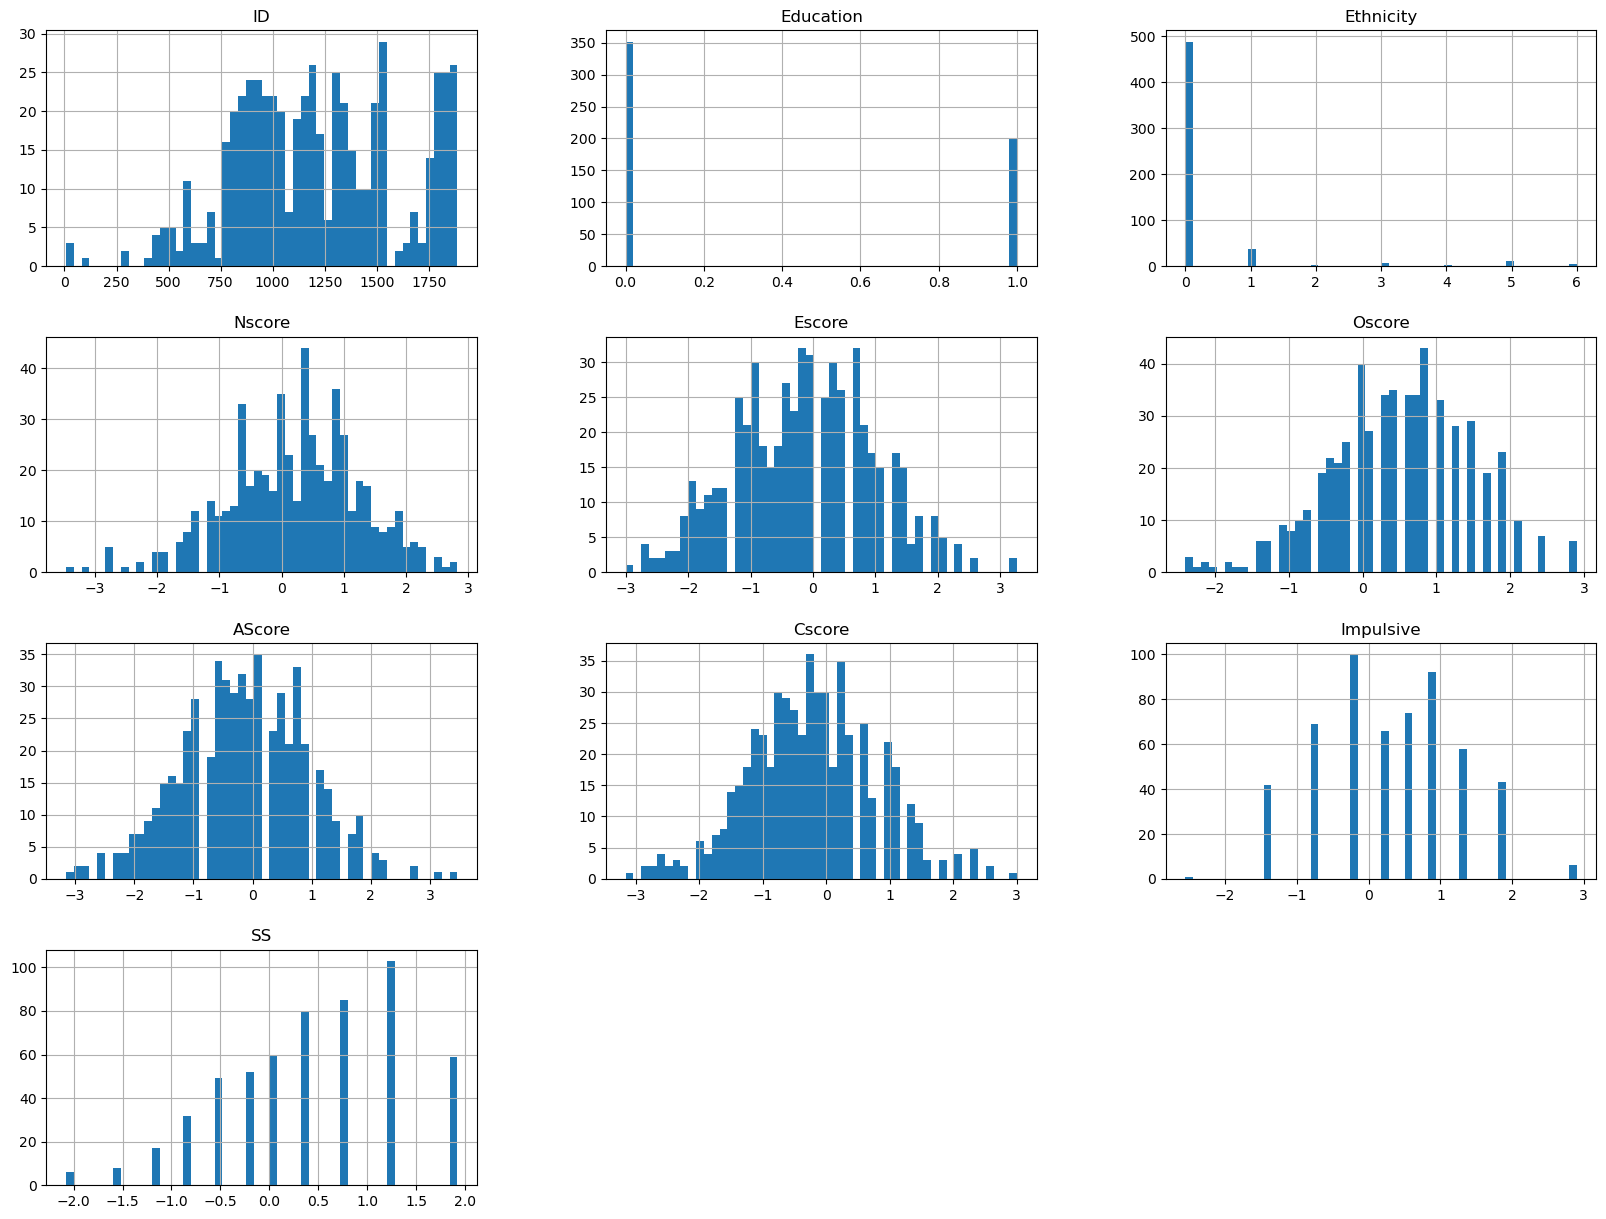

In [19]:
# Okay not really, the highest is Cscore (Conscientiousness)
# But let's graph it anyway
import matplotlib.pyplot as plt

drug_df.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
# Okay now I want to compare the two datasets 
# And see if there's any correlation
# So I want to take specific files from one file and compare them with another
# Let's try merging into one big file first
# This may or may not be helpful for reading, but may help in comparison
recidivism = pd.read_csv("3_year_recidivism_elaborated_2.csv")

frames = [drug_df, recidivism]
total_df = pd.concat(frames, ignore_index=True)
total_df
#Okay now just leave that here

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Main Supervising District,Release type: Paroled to Detainer united,Part of Target Population,Recidivism - Return to Prison numeric
0,7.0,45-54,M,1.0,USA,0.0,-0.46725,-1.09207,-0.45174,-0.30172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,35-44,M,1.0,USA,1.0,1.02119,0.63779,0.88309,-2.90161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.0,55-64,M,0.0,USA,0.0,0.31287,0.32197,1.06238,0.13136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119.0,35-44,F,0.0,USA,0.0,1.83990,-1.92173,-2.39883,1.11406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,35-44,F,1.0,USA,0.0,0.82562,-0.94779,-0.17779,0.43852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.0,2018.0,White - Hispanic,25-34,C Felony,Violent,Not Mentioned,Discharged End of Sentence,Yes,0.0
26567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.0,2018.0,White - Non-Hispanic,25-34,D Felony,Property,5JD,Paroled to Detainer,No,0.0
26568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.0,2018.0,Black - Non-Hispanic,Under 25,Aggravated Misdemeanor,Violent,1JD,Discharged End of Sentence,Yes,0.0
26569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.0,2018.0,White - Non-Hispanic,Under 25,D Felony,Drug,5JD,Parole,No,0.0


In [21]:
# So let's look at the recidivism file
df = pd.read_csv("3_year_recidivism_elaborated_2.csv")

In [22]:
# One of the convicting offence types is 'Drug'
# Let's filter it out so we're just looking at Drug felonies
# We can then see if different types of offenses compare to whether or not
# they return to prison
recid_drug = df[df["Convicting Offense Type"] == "Drug"]
recid_drug

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Main Supervising District,Release type: Paroled to Detainer united,Part of Target Population,Recidivism - Return to Prison numeric
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,8JD,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,3JD,Parole,Yes,1
13,2010,2013,White - Non-Hispanic,25-34,C Felony,Drug,Not Mentioned,Discharged End of Sentence,No,1
15,2010,2013,White - Non-Hispanic,Under 25,D Felony,Drug,4JD,Parole,Yes,1
16,2010,2013,White - Non-Hispanic,25-34,C Felony,Drug,3JD,Parole,Yes,1
...,...,...,...,...,...,...,...,...,...,...
26001,2015,2018,Black - Non-Hispanic,35-44,D Felony,Drug,Not Mentioned,Discharged End of Sentence,Yes,0
26002,2015,2018,White - Non-Hispanic,25-34,C Felony,Drug,4JD,Parole,No,0
26005,2015,2018,White - Non-Hispanic,25-34,C Felony,Drug,5JD,Parole,No,0
26014,2015,2018,Black - Non-Hispanic,Under 25,D Felony,Drug,Not Mentioned,Discharged End of Sentence,Yes,0


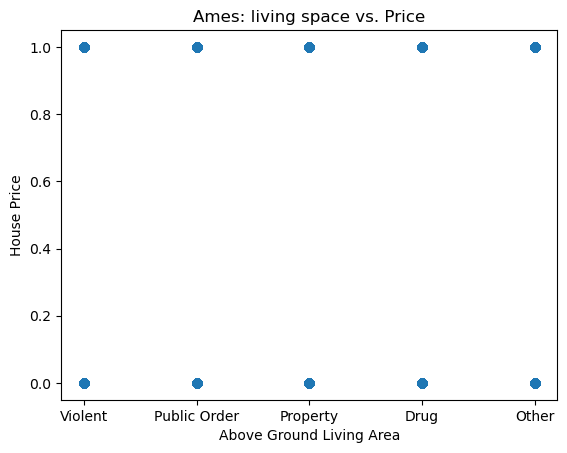

In [36]:
plt.scatter(x=df['Convicting Offense Type'], y=df['Recidivism - Return to Prison numeric'])
plt.xlabel("Above Ground Living Area")
plt.ylabel('House Price')
plt.title('Ames: living space vs. Price')
plt.show()

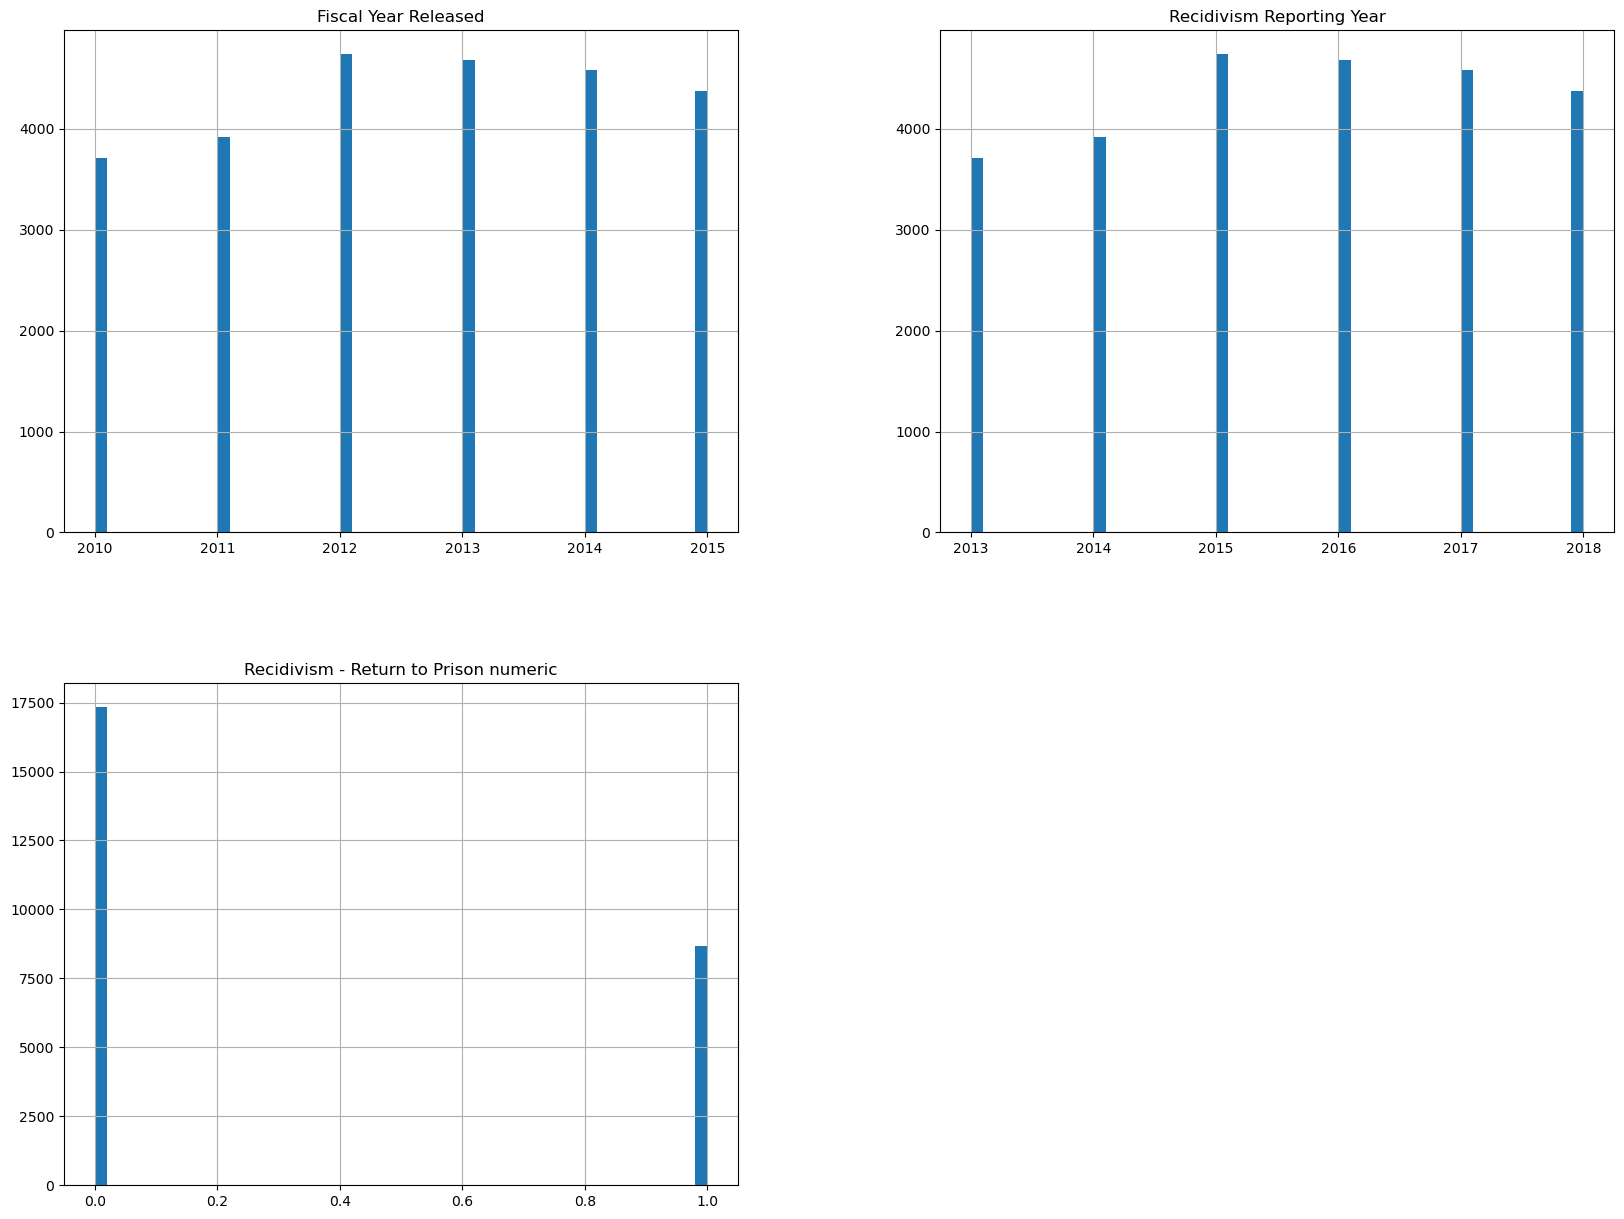

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
# Okay.. any correlations with race?
# Create a correlation matrix 
corr_matrix = df.corr()
corr_matrix['Fiscal Year Released'].sort_values(ascending=False, key=abs)

Fiscal Year Released                     1.00000
Recidivism Reporting Year                1.00000
Recidivism - Return to Prison numeric    0.05799
Name: Fiscal Year Released, dtype: float64

In [35]:
# Nope bc we already knew the 1-1 correlation between years
# And whether or not they returned to prison is just 1=yes 0=no
# So what can we do... there's not much we can measure
df1 = pd.read_csv("Drug_Consumption.csv")

col1 = df1["Cscore"]
col2 = df["Fiscal Year Released"]
corr = col1.corr(col2)
print(corr)

# import plotly.express as px

# x = df['Convicting Offense Classification'].values
# y = df['Release type: Paroled to Detainer united'].values
# z = df['Race - Ethnicity'].values

# fig = px.scatter_3d(df, x, y, z, color='Convicting Offense Classification', labels=x)
# fig.show()

nan


In [31]:
# Alright well that didn't work


nan
